In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-transactions/fraudTest.csv
/kaggle/input/credit-card-transactions/fraudTrain.csv


In [2]:

import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
df=pd.read_csv('/kaggle/input/credit-card-transactions/fraudTrain.csv',parse_dates=['trans_date_trans_time',])

In [4]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1296675 non-null  int64         
 1   trans_date_trans_time  1296675 non-null  datetime64[ns]
 2   cc_num                 1296675 non-null  int64         
 3   merchant               1296675 non-null  object        
 4   category               1296675 non-null  object        
 5   amt                    1296675 non-null  float64       
 6   first                  1296675 non-null  object        
 7   last                   1296675 non-null  object        
 8   gender                 1296675 non-null  object        
 9   street                 1296675 non-null  object        
 10  city                   1296675 non-null  object        
 11  state                  1296675 non-null  object        
 12  zip                    12966

In [6]:
df.isnull()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1296671,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1296672,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1296673,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [8]:
df[df['is_fraud']==1].count()

Unnamed: 0               7506
trans_date_trans_time    7506
cc_num                   7506
merchant                 7506
category                 7506
amt                      7506
first                    7506
last                     7506
gender                   7506
street                   7506
city                     7506
state                    7506
zip                      7506
lat                      7506
long                     7506
city_pop                 7506
job                      7506
dob                      7506
trans_num                7506
unix_time                7506
merch_lat                7506
merch_long               7506
is_fraud                 7506
dtype: int64

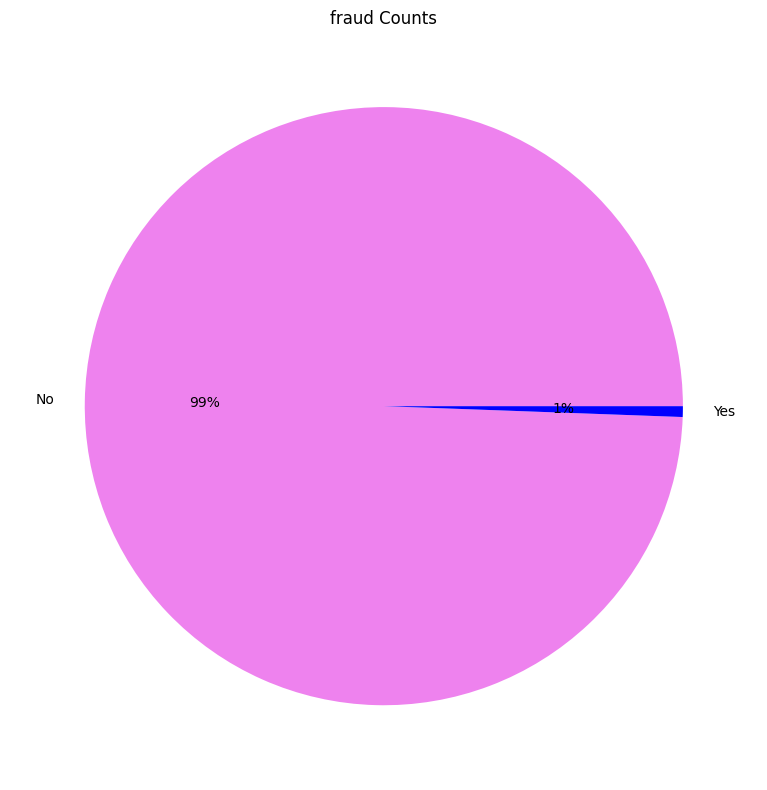

In [9]:
fraud_counts = df["is_fraud"].value_counts()
plt.figure(figsize=(8, 8))
plt.subplot(1, 1, 1)  
plt.pie(fraud_counts, labels=["No", "Yes"], autopct="%0.0f%%", colors=[ 'violet', 'blue'])
plt.title("fraud Counts")
plt.tight_layout() 
plt.show()

In [10]:
a=df['gender'].value_counts()
a

gender
F    709863
M    586812
Name: count, dtype: int64

In [11]:
fraudulent_data = df[df['is_fraud'] > 0]
female_fraudulent_data=fraudulent_data[fraudulent_data['gender']=='F']

male_fraudulent_data=fraudulent_data[fraudulent_data['gender']=='M']
female_fraudulent_count=(female_fraudulent_data.shape[0])
male_fraudulent_count=(male_fraudulent_data.shape[0])
male_fraudulent_count

3771

<function matplotlib.pyplot.show(close=None, block=None)>

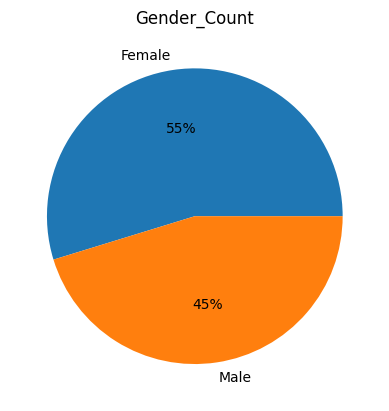

In [12]:
plt.pie(a,labels=["Female","Male"],autopct="%0.0f%%")
plt.title("Gender_Count")
plt.show

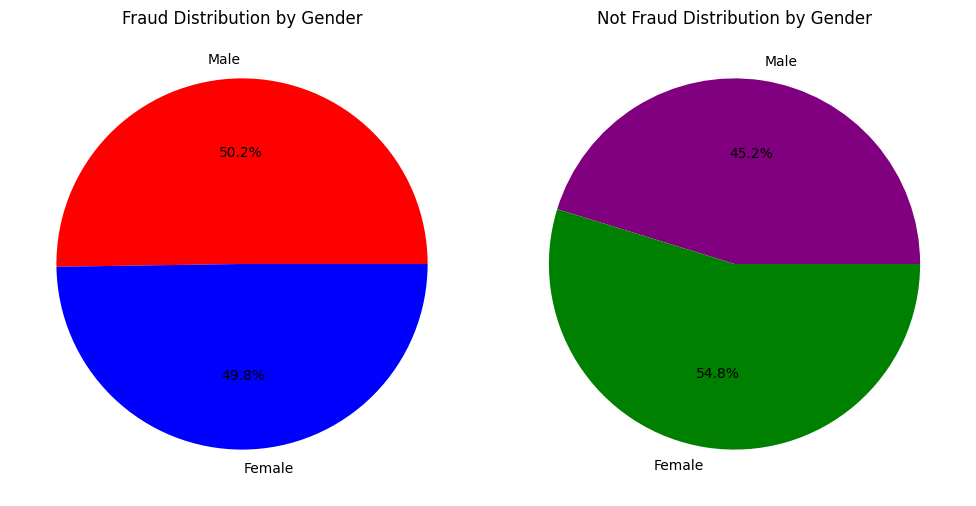

In [13]:
male_not_fraud = a['M'] - male_fraudulent_count
female_not_fraud = a['F'] - female_fraudulent_count

# Tạo dữ liệu cho biểu đồ tròn thứ nhất
fraud_labels = ['Male', 'Female']
fraud_sizes = [male_fraudulent_count, female_fraudulent_count]

# Tạo dữ liệu cho biểu đồ tròn thứ hai
not_fraud_labels = ['Male', 'Female']
not_fraud_sizes = [male_not_fraud, female_not_fraud]

# Vẽ biểu đồ tròn thứ nhất (fraud)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(fraud_sizes, labels=fraud_labels, autopct='%0.1f%%', colors=[ 'red', 'blue'])
plt.title('Fraud Distribution by Gender')

# Vẽ biểu đồ tròn thứ hai (not fraud)
plt.subplot(1, 2, 2)
plt.pie(not_fraud_sizes, labels=not_fraud_labels, autopct='%0.1f%%', colors=['purple','green'])
plt.title('Not Fraud Distribution by Gender')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

In [14]:
numeric_columns = df.select_dtypes(include='number')
fraud_correlation = numeric_columns.corr()['is_fraud'].abs().sort_values(ascending=False)

print(fraud_correlation)

is_fraud      1.000000
amt           0.219404
unix_time     0.005078
Unnamed: 0    0.004767
zip           0.002162
city_pop      0.002136
lat           0.001894
merch_lat     0.001741
merch_long    0.001721
long          0.001721
cc_num        0.000981
Name: is_fraud, dtype: float64


In [15]:
train_data = pd.read_csv('/kaggle/input/credit-card-transactions/fraudTrain.csv')
test_data = pd.read_csv('/kaggle/input/credit-card-transactions/fraudTest.csv')

numeric_columns_train = train_data.select_dtypes(include='number')
numeric_columns_test = test_data.select_dtypes(include='number')

X_train = numeric_columns_train.drop(['is_fraud'], axis=1)
y_train = train_data['is_fraud']

X_test = numeric_columns_test.drop(['is_fraud'], axis=1)
y_test = test_data['is_fraud']

# Preprocess the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")


Accuracy: 0.9959961779244546
Confusion Matrix:
[[553494     80]
 [  2145      0]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719

